In [1]:
import numpy as np 
import pandas as pd
from scipy import misc
import imageio
import matplotlib.pyplot as plt
from os import listdir
import random

# machine learning
from sklearn.model_selection import train_test_split
import keras
from keras import backend as K
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense,BatchNormalization
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import plot_model

#creating figures
import matplotlib.pyplot as plt
import seaborn as sns

#resizing
import cv2
import warnings

In [2]:
img_shape =50

#chest labels are 1 if pneumonia, 0 if normal.
chest_labels = []

#x-rays
chest_images = []

#first six pneumonia and normal chest for visualization only
pneumonia_chest = []
normal_chest = []

#listdir("../input/cell_images/c_images/")
base_path = "chest_xray/train/"


#get pneumonia chest
pneumonia_path = base_path +'PNEUMONIA/'
for file in listdir(pneumonia_path):
    if file.endswith('.jpeg'):
        file_path = pneumonia_path + file
        image = cv2.imread(file_path)
        image = cv2.resize(image,(img_shape,img_shape)).astype('float32')/255.0
        pneumonia_chest.append(image)
        chest_images.append(image)
        chest_labels.append(1)
        
#get normal chest
normal_path = base_path +'NORMAL/'
for file in listdir(normal_path):
    if file.endswith('.jpeg'):
        file_path = normal_path + file
        image = cv2.imread(file_path) 
        image = cv2.resize(image,(img_shape,img_shape)).astype('float32')/255.0   
        normal_chest.append(image)
        chest_images.append(image)
        chest_labels.append(0)

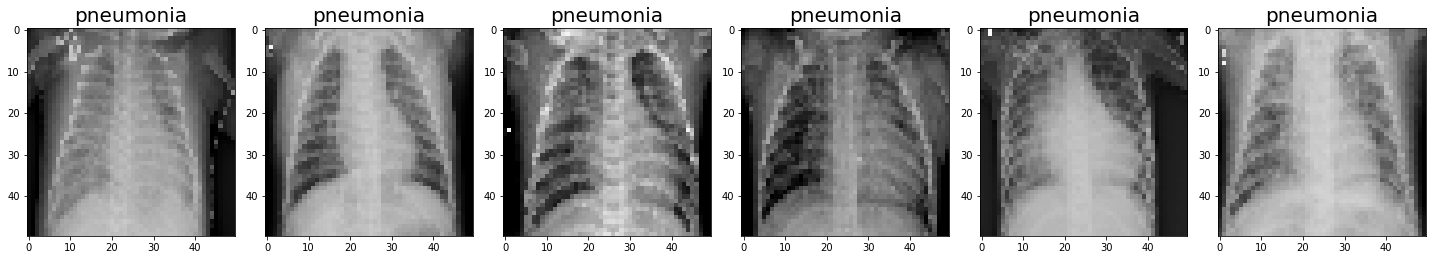

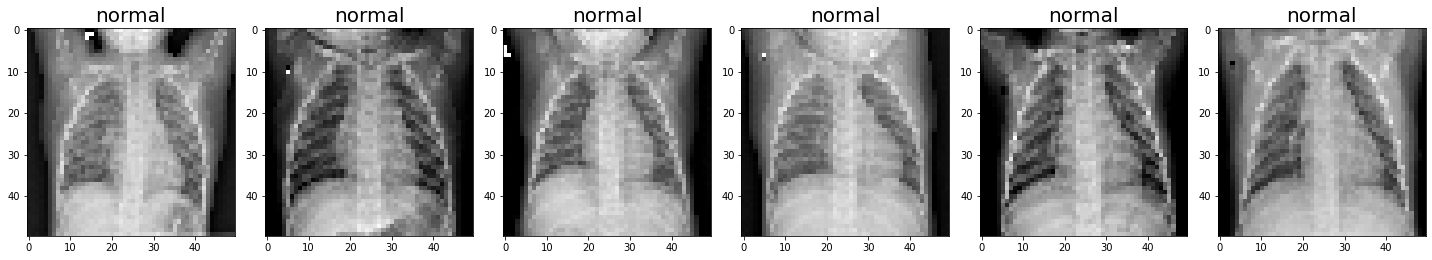

In [3]:
# visualize chest
def ShowFirstSix(images_arr,title):

    fig, axes = plt.subplots(1, 6, figsize=(20,20))

    for img, ax in zip( images_arr, axes):
        ax.imshow(img,cmap='gray')
        ax.set_title(title,fontsize=20)
    plt.tight_layout()
    plt.show()
ShowFirstSix(pneumonia_chest,'pneumonia')
ShowFirstSix(normal_chest,'normal')

In [4]:
def reorder(old_list,order):
    new_list=[]
    for i in order:
        new_list.append(old_list[i])
    return new_list

np.random.seed(seed=42)
indices=np.arange(len(chest_labels))
indices=indices.tolist()
chest_labels=reorder(chest_labels,indices)
chest_images=reorder(chest_images,indices)

#we change it to arrays
image_array=np.array(chest_images)
label_array=np.array(chest_labels)

In [5]:
xtrain,xtest,ytrain,ytest=train_test_split(image_array,label_array,test_size=0.20,random_state=42)

In [6]:
xtrain,xval,ytrain,yval=train_test_split(xtrain,ytrain,test_size=len(ytest),random_state=42)

In [7]:
print('size of train dataset {}'.format((xtrain.shape[0])))
print('size of test dataset {}'.format((xtest.shape[0])))
print('size of validation dataset {}'.format((xval.shape[0])))

size of train dataset 3128
size of test dataset 1044
size of validation dataset 1044


In [8]:
train_datagen = ImageDataGenerator(rescale = 1/255.0,
                                  horizontal_flip = True,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  fill_mode = 'nearest',
                                  zoom_range = 0.3,
                                  rotation_range = 30)
val_datagen = ImageDataGenerator(rescale = 1/255.0)

train_generator = train_datagen.flow(xtrain, ytrain, batch_size = 128, shuffle = False)
val_generator = val_datagen.flow(xtest, ytest, batch_size = 128, shuffle = False)

In [9]:
def create_model():
    model=Sequential()
    
    model.add(Conv2D(32,(3,3), activation='relu', input_shape=(50,50,3),padding='same'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(256,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1,activation='sigmoid'))
    
    return model

In [10]:
model=create_model()
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

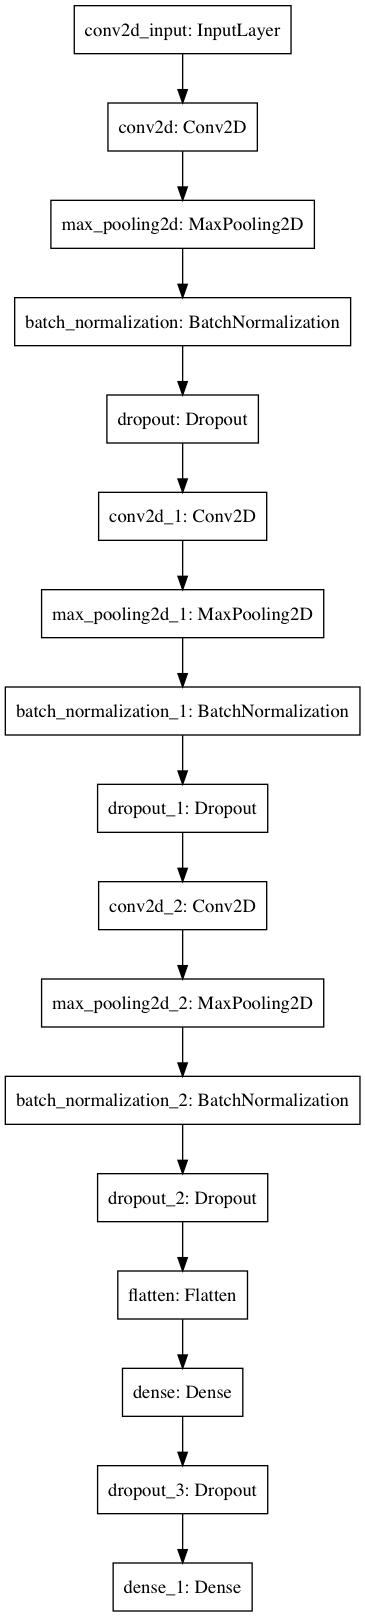

In [11]:
plot_model(model, to_file='model_plot.png')

In [12]:
history=model.fit(train_generator,epochs=25,validation_data=val_generator,verbose=1)

Epoch 1/25
25/25 [==============================] - 12s 484ms/step - loss: 0.6611 - accuracy: 0.7583 - val_loss: 0.6095 - val_accuracy: 0.7213
Epoch 2/25
25/25 [==============================] - 12s 464ms/step - loss: 0.3985 - accuracy: 0.8434 - val_loss: 0.5948 - val_accuracy: 0.7213
Epoch 3/25
25/25 [==============================] - 12s 464ms/step - loss: 0.3546 - accuracy: 0.8552 - val_loss: 0.6816 - val_accuracy: 0.7213
Epoch 4/25
25/25 [==============================] - 12s 467ms/step - loss: 0.3177 - accuracy: 0.8660 - val_loss: 0.8134 - val_accuracy: 0.7213
Epoch 5/25
25/25 [==============================] - 12s 476ms/step - loss: 0.2901 - accuracy: 0.8756 - val_loss: 1.0477 - val_accuracy: 0.7213
Epoch 6/25
25/25 [==============================] - 12s 467ms/step - loss: 0.2964 - accuracy: 0.8721 - val_loss: 1.4147 - val_accuracy: 0.7213
Epoch 7/25
25/25 [==============================] - 12s 479ms/step - loss: 0.2907 - accuracy: 0.8808 - val_loss: 1.5677 - val_accuracy: 0.7213

In [13]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


<function matplotlib.pyplot.show(close=None, block=None)>

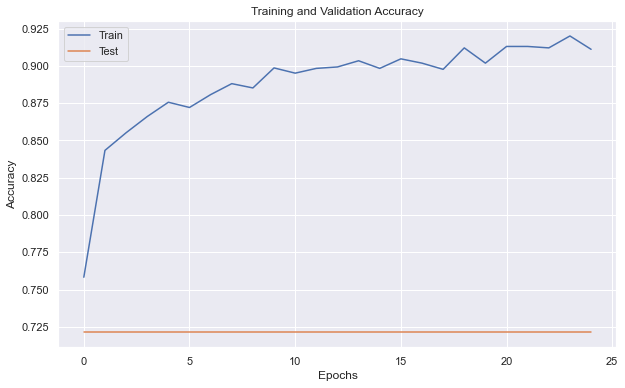

In [14]:
plt.figure(figsize=(10,6))
sns.set()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'],loc='upper left')
plt.show

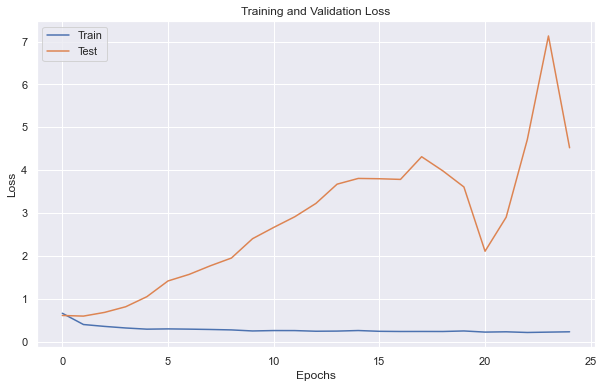

In [15]:
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train','Test'],loc='upper left')
plt.show()